# Advanced Epi II: Introduction to Python
## Lesson 6
- Supvervised Machine Learning
---
Machine learning is the process whereby computers learn to make decisions from data without being explicitly programmed. 

For example:
- Learning to predict whether an email is spam or not spam given its content and sender.
- Learning to cluster books into different categories based on the words they contain, then assigning any new book to one of the existing clusters.

**Unsupervised learning** is the process of uncovering hidden patterns and structures from unlabeled data. For example, a business may wish to group its customers into distinct categories based on their purchasing behavior without knowing in advance what these categories are.

**Supervised learning** is a type of machine learning where the values to be predicted are already known, and a model is built with the aim of accurately predicting values of previously unseen data.

There are two types of supervised learning:
1. **Classification** is used to predict the label, or category, of an observation (for example, we can predict whether a bank transaction is fraudulent or not).
2. **Regression** is used to predict continuous values (for example, a model can use features such as number of bedrooms, and the size of a property, to predict the target variable, price of the property).

There are some requirements to satisfy before performing supervised learning: Our data must not have missing values, must be in numeric format, and stored as pandas DataFrames or Series, or NumPy arrays.

Scikit-learn (**`sklearn`**) is one of the most widely used machine learning libraries in Python. It provides **simple and efficient tools** for **data mining, machine learning, and predictive analytics**.

![scikit-learn logo](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/520px-Scikit_learn_logo_small.svg.png)

- **Easy-to-use API** – scikit-learn follows the same syntax for all supervised learning models, which makes the workflow repeatable.  
- **Comprehensive collection of ML algorithms** – Supports regression, classification, clustering, and dimensionality reduction.  
- **Seamless integration with NumPy & Pandas** – Works directly with structured data.  
- **Built-in tools for model evaluation** – Cross-validation, hyperparameter tuning, and scoring metrics.

### Binary classification: K-nearest neighbor
Binary classification is used to predict a target variable that has only two labels, typically represented numerically with a 0 or a 1.

There are four steps of classifying labels of unseen data:
1. Build a model
2. Model learns from labeled data (= training data) we pass to it
3. Pass unlabeled data to the model as input
4. Model predicts the labels of the unseen data

In [ ]:
from sklearn.module import Model

model = Model() # instantiate model
model.fit(X, y) # fit model
model.predict(X_new) # predict (new) values

K-Nearest Neighbors (KNN) is a **supervised machine learning algorithm** used for **classification and regression tasks**. It is **simple, yet powerful**, relying on the idea that **similar data points exist in close proximity**.

1. **Choose a value for "K"** (number of neighbors to consider).
2. **Measure distances** between the new data point and all existing points (commonly using Euclidean distance).
3. **Find the K nearest neighbors** (i.e., the K closest data points).
4. **Classification:** Assign the most common label among the neighbors.
5. **Regression:** Take the average value of the neighbors.

![Select k appropriately](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*3NnKUNwoeMt-KFqE.jpeg)

When to Use KNN?
- **Classification Problems** – Handwritten digit recognition, disease prediction, spam detection.  
- **Regression Problems** – Predicting house prices, customer behavior analysis.  
- **Non-linear Decision Boundaries** – KNN can capture complex patterns.  

To fit a KNN model using scikit-learn, we split our data into `X`, a 2D array of our features, and `y`, a 1D array of the target values. 

scikit-learn requires that the features are in an array where each column is a feature and each row a different observation. Similarly, the target needs to be a single column with the same number of observations as the feature data.

In [239]:
import pandas as pd

df = pd.read_csv("ObesityDataSet.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [114]:
# Dictionary mapping for variable renaming
column_mapping = {
    "FAVC": "Frequent_High_Calorie_Intake",  # If the person frequently consumes high-calorie foods
    "FCVC": "Vegetable_Consumption_Frequency",  # Frequency of vegetable consumption (scale from 1 to 3)
    "NCP": "Number_of_Main_Meals",  # Number of main meals per day
    "CAEC": "Snacking_Frequency",  # Frequency of consuming food between meals
    "SMOKE": "Smoking_Status",  # Whether the person smokes (yes/no)
    "CH2O": "Daily_Water_Intake",  # Daily water intake (scale from 1 to 3)
    "SCC": "Calorie_Intake_Monitoring",  # If the person monitors their calorie intake
    "FAF": "Physical_Activity_Frequency",  # Physical activity frequency (scale from 0 to 3)
    "TUE": "Technology_Usage_Time",  # Time spent using technology (scale from 0 to 3)
    "CALC": "Alcohol_Consumption_Frequency",  # Frequency of alcohol consumption
    "MTRANS": "Main_Transportation_Mode",  # Main mode of transportation
    "NObeyesdad": "Obesity_Level"  # Obesity level classification
}

# Apply renaming to a DataFrame
df.rename(columns=column_mapping, inplace=True)
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

In [111]:
df.to_csv("ObesityData.csv", index=False)

In [240]:
df = pd.read_csv("ObesityData.csv")

In [115]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent_High_Calorie_Intake,Vegetable_Consumption_Frequency,Number_of_Main_Meals,Snacking_Frequency,Smoking_Status,Daily_Water_Intake,Calorie_Intake_Monitoring,Physical_Activity_Frequency,Technology_Usage_Time,Alcohol_Consumption_Frequency,Main_Transportation_Mode,Obesity_Level,BMI
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III,44.940324
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III,43.670204
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III,43.653878
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III,44.044788


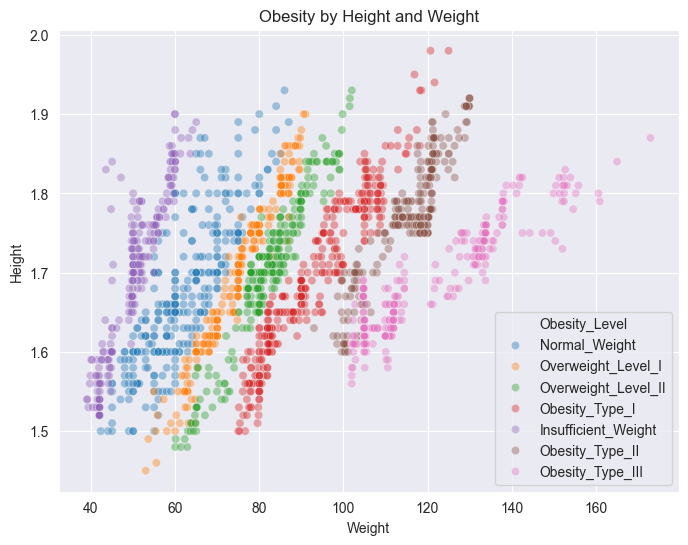

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of "bmi" and "age" with "stroke" as color
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Weight"], y=df["Height"], hue=df["Obesity_Level"], alpha=0.4)

# Labels and title
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Obesity by Height and Weight")

# Show the plot
plt.show()

In [122]:
## Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#y = df["Obesity_Level"].values 
y = pd.factorize(df["Obesity_Level"])[0]
X = df[["Height", "Weight"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [118]:
import numpy as np

X_new = np.array([[180, 50],
                  [170, 70],
                  [150, 100]])

In [119]:
y_pred = knn.predict(X_new)

print("Predictions: {}".format(y_pred))

Predictions: ['Insufficient_Weight' 'Normal_Weight' 'Overweight_Level_II']


/Users/_ariee_/Library/Caches/JetBrains/PyCharm2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


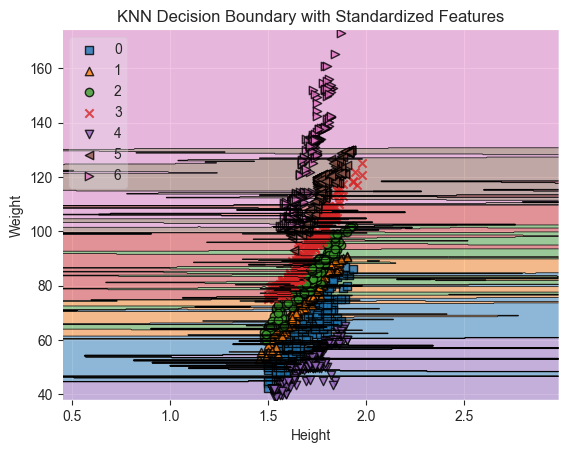

In [124]:
from mlxtend.plotting import plot_decision_regions

knn.fit(X, y)

plot_decision_regions(X, y, clf=knn, legend=2)

plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("KNN Decision Boundary with Standardized Features")
plt.show()

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["Height", "Weight"]])

knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=6)

/Users/_ariee_/Library/Caches/JetBrains/PyCharm2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


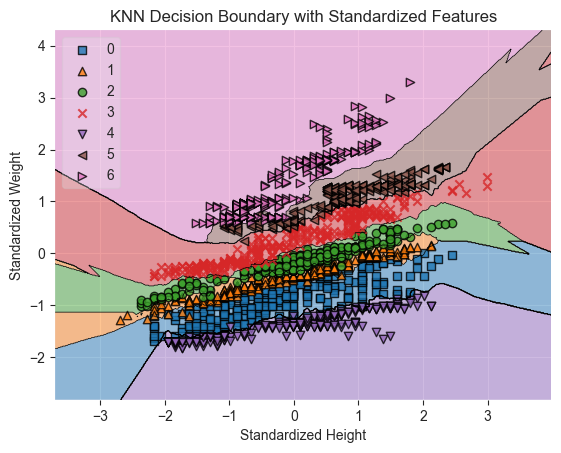

In [126]:
plot_decision_regions(X_scaled, y, clf=knn, legend=2)

plt.xlabel("Standardized Height")
plt.ylabel("Standardized Weight")
plt.title("KNN Decision Boundary with Standardized Features")
plt.show()

### Measuring model performance
It is common to split data into **a training set** and **a test set**. We fit the classifier using the training set, then we calculate the model's accuracy against the test set's labels.

![measure model performance](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*4Yn8nGA8dfr255QuLrOLMg.png)


Before including all variables in a dataset, we have to make them numerical via **label encoding**:

In [241]:
# List of categorical columns to encode
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
df_categorical = df[categorical_cols]

In [242]:
df_categorical

,Gender,family_history_with_overweight,Frequent_High_Calorie_Intake,Snacking_Frequency,Smoking_Status,Calorie_Intake_Monitoring,Alcohol_Consumption_Frequency,Main_Transportation_Mode,Obesity_Level
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [243]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical variables
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()  # Create a label encoder for each column
    df[col] = label_encoders[col].fit_transform(df[col]) 

In [132]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent_High_Calorie_Intake,Vegetable_Consumption_Frequency,Number_of_Main_Meals,Snacking_Frequency,Smoking_Status,Daily_Water_Intake,Calorie_Intake_Monitoring,Physical_Activity_Frequency,Technology_Usage_Time,Alcohol_Consumption_Frequency,Main_Transportation_Mode,Obesity_Level,BMI
0,0,21,1.62,64.00,1,0,2.0,3.0,2,0,2.00,0,0.00,1.000,3,3,1,24.386526
1,0,21,1.52,56.00,1,0,3.0,3.0,2,1,3.00,1,3.00,0.000,2,3,1,24.238227
2,1,23,1.80,77.00,1,0,2.0,3.0,2,0,2.00,0,2.00,1.000,1,3,1,23.765432
3,1,27,1.80,87.00,0,0,3.0,3.0,2,0,2.00,0,2.00,0.000,1,4,5,26.851852
4,1,22,1.78,89.80,0,0,2.0,1.0,2,0,2.00,0,0.00,0.000,2,3,6,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3.0,3.0,2,0,1.73,0,1.68,0.906,2,3,4,44.940324
2107,0,22,1.75,133.74,1,1,3.0,3.0,2,0,2.01,0,1.34,0.599,2,3,4,43.670204
2108,0,23,1.75,133.69,1,1,3.0,3.0,2,0,2.05,0,1.41,0.646,2,3,4,43.653878
2109,0,24,1.74,133.35,1,1,3.0,3.0,2,0,2.85,0,1.14,0.586,2,3,4,44.044788


In [244]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Obesity_Level"])  # Assuming "stroke" is the target variable
y = df["Obesity_Level"]

# Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Output dataset shapes
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (1688, 17) (1688,)
Test Set Shape: (423, 17) (423,)


In [134]:
# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [135]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9432624113475178


Find the optimal k-neighbours:

In [136]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
    
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.9840047393364929, np.int64(3): 0.9727488151658767, np.int64(4): 0.9721563981042654, np.int64(5): 0.9656398104265402, np.int64(6): 0.9620853080568721, np.int64(7): 0.955568720379147, np.int64(8): 0.9502369668246445, np.int64(9): 0.9449052132701422, np.int64(10): 0.9454976303317536, np.int64(11): 0.9437203791469194, np.int64(12): 0.9383886255924171} 
 {np.int64(1): 0.9527186761229315, np.int64(2): 0.9574468085106383, np.int64(3): 0.950354609929078, np.int64(4): 0.9527186761229315, np.int64(5): 0.9432624113475178, np.int64(6): 0.9432624113475178, np.int64(7): 0.9219858156028369, np.int64(8): 0.9243498817966903, np.int64(9): 0.9243498817966903, np.int64(10): 0.9267139479905437, np.int64(11): 0.9196217494089834, np.int64(12): 0.9148936170212766}


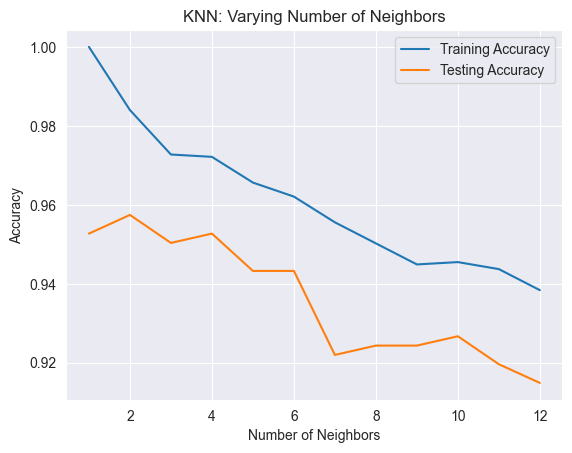

In [137]:
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [254]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {"n_neighbors": np.arange(2, 15)}  # Start bei k=3, überspringe gerade Zahlen
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get the best parameter and corresponding accuracy
best_k = grid_search.best_params_["n_neighbors"]
best_score = grid_search.best_score_

print("Best k:", best_k)
print("Best accuracy:", best_score)


Best k: 2
Best accuracy: 0.949029901848893


### Another KNN example

In [185]:
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


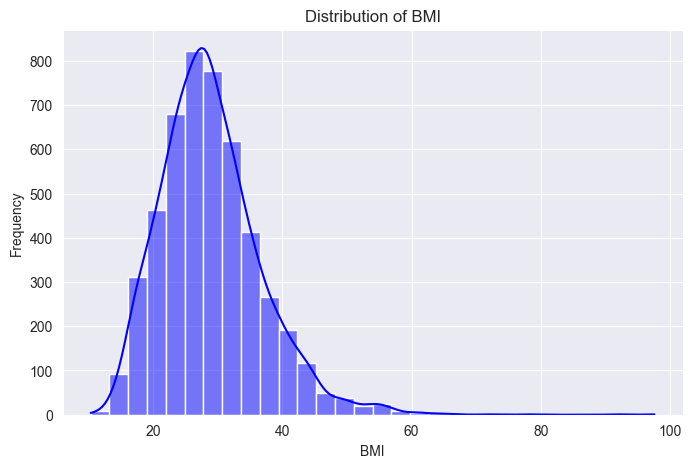

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of BMI values
plt.figure(figsize=(8, 5))
sns.histplot(df["bmi"], bins=30, kde=True, color="blue")

# Labels and title
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Distribution of BMI")

# Show the plot
plt.show()

In [187]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [188]:
df["bmi"].fillna(df["bmi"].median(), inplace=True)

/var/folders/zc/7mjx7d5j2mj_t65nrcs40wkh0000gn/T/ipykernel_73188/1520055502.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bmi"].fillna(df["bmi"].median(), inplace=True)


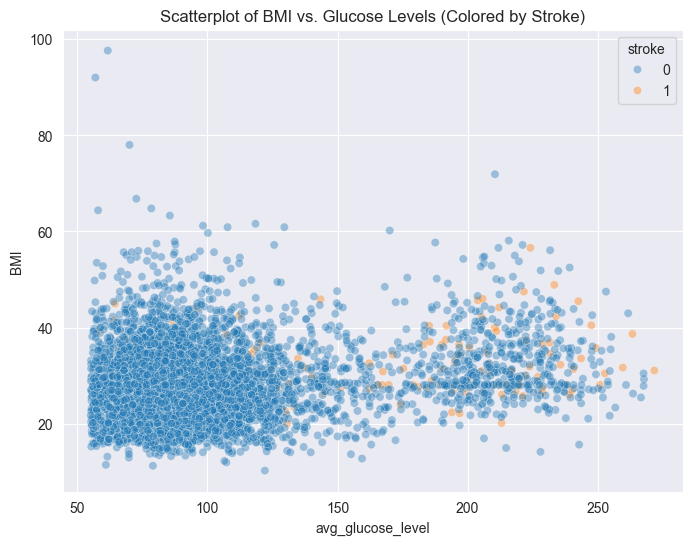

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of "bmi" and "age" with "stroke" as color
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["avg_glucose_level"], y=df["bmi"], hue=df["stroke"], alpha=0.4)

# Labels and title
plt.xlabel("avg_glucose_level")
plt.ylabel("BMI")
plt.title("Scatterplot of BMI vs. Glucose Levels (Colored by Stroke)")

# Show the plot
plt.show()

In [190]:
## Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = df["stroke"].values
X = df[["age", "avg_glucose_level", "bmi"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [191]:
import numpy as np

X_new = np.array([[70, 250, 35],
                  [28, 80, 21]])

In [192]:
y_pred = knn.predict(X_new)

print("Predictions: {}".format(y_pred))

Predictions: [0 0]


In [193]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

# Apply Label Encoding to categorical variables
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()  # Create a label encoder for each column
    df[col] = label_encoders[col].fit_transform(df[col])  # Transform column

In [194]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["stroke"])  # Assuming "stroke" is the target variable
y = df["stroke"]

# Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Output dataset shapes
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (4088, 11) (4088,)
Test Set Shape: (1022, 11) (1022,)


In [195]:
# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [196]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9510763209393346


In [197]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
    
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.9549902152641878, np.int64(3): 0.9559686888454012, np.int64(4): 0.951320939334638, np.int64(5): 0.951320939334638, np.int64(6): 0.951320939334638, np.int64(7): 0.951320939334638, np.int64(8): 0.951320939334638, np.int64(9): 0.951320939334638, np.int64(10): 0.951320939334638, np.int64(11): 0.951320939334638, np.int64(12): 0.951320939334638} 
 {np.int64(1): 0.9197651663405088, np.int64(2): 0.9500978473581213, np.int64(3): 0.9471624266144814, np.int64(4): 0.9510763209393346, np.int64(5): 0.9510763209393346, np.int64(6): 0.9510763209393346, np.int64(7): 0.9510763209393346, np.int64(8): 0.9510763209393346, np.int64(9): 0.9510763209393346, np.int64(10): 0.9510763209393346, np.int64(11): 0.9510763209393346, np.int64(12): 0.9510763209393346}


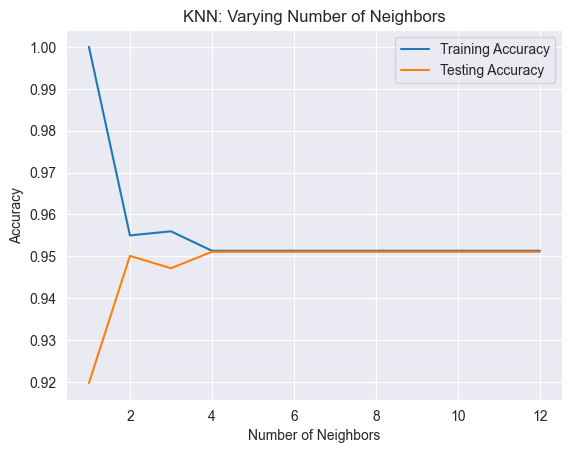

In [198]:
plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

### Regression
Regression is a **supervised learning technique** used to model the relationship between a **dependent variable (target)** and one or more **independent variables (features)**. It is primarily used for **predicting continuous values** such as house prices, stock prices, or medical metrics like BMI.

- **Predict numerical outcomes** (e.g., predicting a patient’s blood pressure based on age and weight).
-  **Identify relationships** between variables (e.g., how smoking affects lung capacity).
-   **Understand trends and patterns** (e.g., sales forecasting).  

Types of Regression Models:
| **Type** | **Description** | **Example Use Case** |
|----------|---------------|---------------------|
| **Linear Regression** | Fits a straight line to data | Predicting house prices |
| **Multiple Regression** | Uses multiple variables to predict an outcome | BMI prediction based on age, diet, and activity level |
| **Polynomial Regression** | Captures non-linear relationships | Modeling disease progression |
| **Logistic Regression** | Used for binary classification (despite the name) | Stroke prediction (Yes/No) |
| **Ridge & Lasso Regression** | Handle multicollinearity by penalizing large coefficients | Feature selection in medical research |



In [255]:
import pandas as pd

df = pd.read_csv("world_happiness_2024.csv")
df

,Country name,Happiness Rank,Happiness score,Upperwhisker,Lowerwhisker,Economy (GDP per Capita)\t,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,2,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,3,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,4,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,5,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193
...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),139,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072
139,Sierra Leone,140,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053
140,Lesotho,141,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085
141,Lebanon,142,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029


In [256]:
df.isnull().sum()

Country name                    0
Happiness Rank                  0
Happiness score                 0
Upperwhisker                    0
Lowerwhisker                    0
Economy (GDP per Capita)\t      3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
dtype: int64

In [257]:
df.dropna(inplace=True)

In [258]:
import numpy as np

X = df["Social support"].values
y = df["Happiness score"].values
X = X.reshape(-1, 1) # Reshape X so it fulfills the condition of a two-dimensional array

print(X.shape, y.shape)

(140, 1) (140,)


In [259]:
## how the reshape-method works
arr = np.array([1, 2, 3, 4, 5, 6])
reshaped_arr = arr.reshape(2, 3)  # Reshape to 2 rows, 3 columns
print(reshaped_arr)

[[1 2 3]
 [4 5 6]]


In [260]:
reshaped_arr = arr.reshape(-1, 2)  # NumPy automatically calculates rows
print(reshaped_arr)

[[1 2]
 [3 4]
 [5 6]]


In [261]:
column_vector = arr.reshape(-1, 1)  # Make it a column vector (4 rows, 1 column)
print(column_vector)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [262]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)

print(predictions[:5])

[6.79275297 6.64283063 6.92249346 6.58805131 6.62264877]


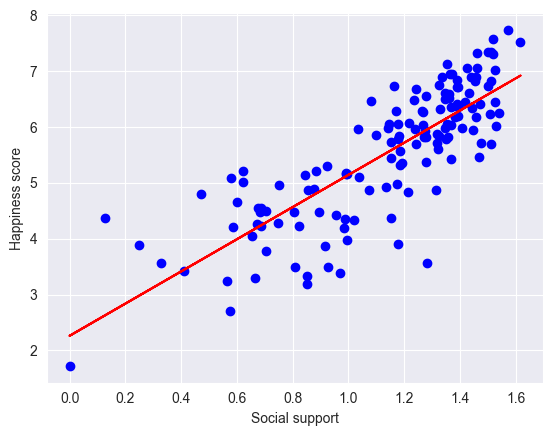

In [263]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color="blue")
plt.plot(X, predictions, color="red")
plt.ylabel("Happiness score")
plt.xlabel("Social support")
plt.show()

### Regression Mechanics

- $y = ax + b$
  - Simple linear regression uses one feature
    - $y$ = target
    - $x$ = single feature
    - $a, b$ = parameters/coefficients of the model - slope, intercept

- **How do we choose $a$ and $b$?**
  - Define an **error function** for any given line
  - Choose the line that **minimizes the error function**

- **Error function** = loss function = cost function

The loss function             |  Residual sum of squares (RSS)
:-------------------------:|:-------------------------:
![loss function](https://anhhaibkhn.github.io/Data-Science-selfstudy-notes-Blog/images/copied_from_nb/images/regression2.png)  |  ![residuals](https://anhhaibkhn.github.io/Data-Science-selfstudy-notes-Blog/images/copied_from_nb/images/regression3.png)

To advoice, the positive Residuals cancel out the negative ones, we use Residual Sum of Squares (RSS). **We aim to minimize the RSS**.

### Linear Regression in higher dimensions

$y = a_1x_1 + a_2x_2 + b$

- To fit a linear regression model here:
  - Need to specify 3 variables: $ a_1, a_2, b $

- **In higher dimensions:**
  - Known as **multiple regression**
  - Must specify coefficients for each feature and the variable $ b $

$
y = a_1x_1 + a_2x_2 + a_3x_3 + \dots + a_nx_n + b
$

- **scikit-learn works exactly the same way:**
  - Pass two arrays: **features and target**

In [264]:
from sklearn.model_selection import train_test_split

X = df.drop(["Country name", "Happiness Rank", "Happiness score", "Upperwhisker", "Lowerwhisker"], axis=1).values
y = df["Happiness score"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [265]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [266]:
# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [4.04195481 5.92880484], Actual Values: [4.485 5.823]


### Measure model performance

- $ R^2 $: Quantifies the **variance in target values** explained by the features.
  - Values range from **0 to 1**.
  
- **High $ R^2 $**:
  - The regression model fits the data well.
  - Most of the variance in the dependent variable is explained by the independent variables.

- **Low $ R^2 $**:
  - The regression model does **not** explain much of the variance.
  - The relationship between the dependent and independent variables is weak.

The R-squared may need to be **above 0.95** for a regression model to be considered reliable.

![r squared](https://media.datacamp.com/cms/google/ad_4nxfuroayke-nkjgjgjrgek5unmljppognwgxxavch5lenltkinljhwt1dzt9gndjlyzgtbyqb6gzn-xgibua34uwwwpfdx5ewawwpoblmom5vqmpmedqpmuc9d8pfu6dv1utzbfl8s3ep-ml_p3e7ifsbu0l.png)

$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

- **MSE** is measured in target units, squared.
- It calculates the average squared difference between actual and predicted values.
- Lower values indicate a better model fit.

$
RMSE = \sqrt{MSE}
$

- **RMSE** is the square root of MSE.
- It is measured in the **same units** as the target variable.
- RMSE is often preferred over MSE because it is more interpretable in real-world units.


In [267]:
# Import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.8415170810759417
RMSE: 0.4860724731799628


Accuracy might not always be the best metric to evaluate a model. In case of **class imbalance**, other metrices might be more suitable:

- **Example: Fraudulent bank transactions classification** 
  - 99% of transactions are legitimate; **only 1% are fraudulent**.

- **The problem with class imbalance:**
  - A classifier that predicts **all transactions as legitimate** would be **99% accurate**.
  - But it would completely **fail** at detecting fraudulent transactions.
  - **Fails at its original purpose** – identifying fraud.

- **Class imbalance occurs when there is an uneven frequency of classes.**
  - The model may be biased toward the majority class.
  - Standard accuracy is **not a reliable performance metric**.

- **Solution: Need a different way to assess performance!**
  - Use **Precision, Recall, F1-score, and AUC-ROC** instead of raw accuracy.
  - Consider **resampling techniques** (oversampling the minority class or undersampling the majority class).
  - Use algorithms that handle class imbalance well (e.g., **SMOTE, Weighted Loss Functions**).

**Class imbalance is common in fraud detection, medical diagnoses, and rare event predictions!**

A **confusion matrix** summarizes the performance of a classification model by comparing predicted and actual values.

![confusion matrix](https://miro.medium.com/v2/resize:fit:712/format:webp/1*g5zpskPaxO8uSl0OWT4NTQ.png)

These metrics help evaluate a model beyond simple accuracy, especially when dealing with imbalanced datasets:

1. **1️ Accuracy**

$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$

- Measures overall correctness.
- **Not reliable in imbalanced datasets** (e.g., if fraud cases are rare, the model can predict "legitimate" always and still have high accuracy).

2. **Precision (Positive Predictive Value)**

$
Precision = \frac{TP}{TP + FP}
$

- Of all predicted fraudulent cases, **how many are actually fraudulent?**
- **High precision** means **fewer false alarms** (low false positives).
- Important when **false positives are costly** (e.g., unnecessary fraud investigations).

3. ** Recall (Sensitivity, True Positive Rate)**

$
Recall = \frac{TP}{TP + FN}
$

- Of all actual fraud cases, **how many did we catch?**
- **High recall** means **fewer missed fraud cases** (low false negatives).
- Crucial when **missing a fraud case is costly** (e.g., detecting diseases in healthcare).

4. **F1-Score (Harmonic Mean of Precision & Recall)**

$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$

- **Balances Precision & Recall** into a single metric.
- Useful when **you need both high fraud detection and few false alarms**.

5. ** Specificity (True Negative Rate)**

$Specificity = \frac{TN}{TN + FP}$

- Of all actual **legitimate** transactions, how many were correctly identified?
- Important in **fraud prevention** to avoid unnecessary flagging.

6. **ROC Curve & AUC (Area Under the Curve)**
- **ROC Curve** plots **True Positive Rate (Recall) vs. False Positive Rate**.
- **AUC-ROC Score** measures overall model performance (1.0 = perfect, 0.5 = random).

**Choosing the right metric depends on the problem:**
- **Fraud detection → High Recall**
- **Medical diagnoses → High Recall**
- **Spam filtering → High Precision (to avoid false flags)**


In [199]:
## run the KNN-model with the stroke dataset before running this

from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) ## data is strongly imbalanced -> Many classifieres have no predictive meaning

[[972   0]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/Users/_ariee_/Library/Caches/JetBrains/PyCharm2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/_ariee_/Library/Caches/JetBrains/PyCharm2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/_ariee_/Library/Caches/JetBrains/PyCharm2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being s

In [200]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

[[972   0]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       1.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.98      0.50      0.49      1022
weighted avg       0.95      0.95      0.93      1022



Calculate the ROC curve:

In [201]:
y_pred_probs = knn.predict_proba(X_test)[:, 1] # predict probabilities
print(y_pred_probs[:10])

[0.         0.         0.         0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.        ]


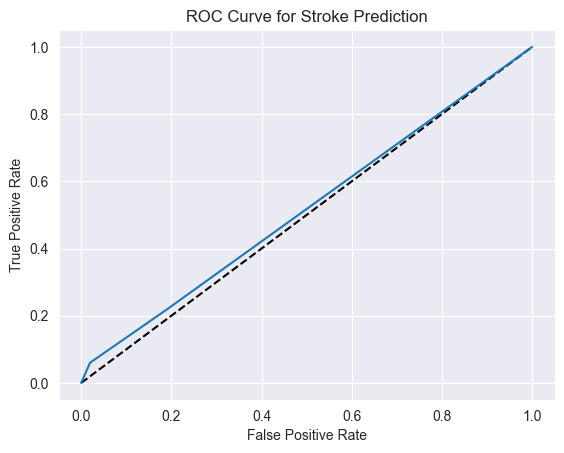

In [202]:
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stroke Prediction')
plt.show() # the model is pretty bad, proving that accuracy is not always the best metric!

In [203]:
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs)) # a good score would be 0.8 to 0.9

0.5179115226337448


### Cross validation
If we're computing R-squared on our test set, the R-squared returned is dependent on the way that we split up the data. The data points in the test set may have some peculiarities that mean the R-squared computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially a random split, we use a technique called **cross-validation**.

![cross validation](https://towardsdatascience.com/wp-content/uploads/2023/12/1N45hocCMP0u4nXLe0WuSvw.png)

As we split the dataset into five folds, we call this process 5-fold cross-validation. If we use 10 folds, it is called 10-fold cross-validation. More generally, if we use k folds, it is called **k-fold cross-validation**.

In [226]:
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)
reg = LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv=kf)

print(cv_scores) # R-sqaured values

[0.62855745 0.62176886 0.53033876 0.6809898  0.70070597 0.48350942]


In [227]:
print(np.mean(cv_scores))
print(np.std(cv_scores))
print(np.quantile(cv_scores, [0.025, 0.975]))

0.6076450425924751
0.07752689470038752
[0.48936308 0.69824145]


### Model tuning
Fitting a linear regression model minimizes a loss function to choose a coefficient, a, for each feature, and the intercept, b. If we allow these coefficients to be very large, we can get overfitting. Therefore, it is common practice to alter the loss function so that it penalizes large coefficients. This is called **regularization**. There are different methods:

1. Ridge Regression

- **Loss function** = OLS (Ordinary Least Squares) loss function **+**  
$
\alpha * \sum_{i=1}^{n} a_i^2
$

- **Ridge regression** penalizes large positive or negative coefficients.
- **$ \alpha $** is a parameter that needs to be chosen.
- Choosing $ \alpha $ is similar to picking **$ k $** in KNN.
- **Hyperparameter**: A variable used to optimize model parameters.
- **$ \alpha $ controls model complexity**:
  - $ \alpha = 0 $ → OLS regression (**can lead to overfitting**).
  - Very high $ \alpha $ → **can lead to underfitting**.


In [268]:
from sklearn.linear_model import Ridge

alphas = [0.1, 1, 10, 100, 1000, 10000]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
  
print(ridge_scores)

[0.8414490573574902, 0.8408326004136684, 0.8343531600961476, 0.7551965386326307, 0.31404296393873665, 0.04361288137038377]


In [270]:
param_grid = {"alpha": [0.1, 1, 10, 100, 1000, 10000]}
ridge = Ridge()

# Perform Grid Search
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# Get the best parameter and corresponding R² score
best_alpha = grid_search.best_params_["alpha"]
best_score = grid_search.best_score_

print(best_alpha, best_score)

10 0.7137852674638092


In [271]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.8343531600961476

2. Lasso Regression (Least Absolute Shrinkage and Selection Operator)

- **Loss function** = OLS (Ordinary Least Squares) loss function **+**  
$
\alpha * \sum_{i=1}^{n} |a_i|
$

- **Lasso regression**  adds an **L1 penalty** to the loss function.
- Encourages **sparsity** by setting some coefficients **exactly to zero** → performs **feature selection**.
- **$ \alpha $** is a regularization parameter that controls model complexity:
  - $ \alpha = 0 $ → OLS regression (**no feature selection**).
  - **Higher $ \alpha $** → More coefficients shrink to **zero**, leading to a simpler model.

 **Lasso is useful when you want to select the most important features in a dataset!**


[0.46341366 0.         0.         0.         0.         0.        ]


/Users/_ariee_/Library/Caches/JetBrains/PyCharm2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


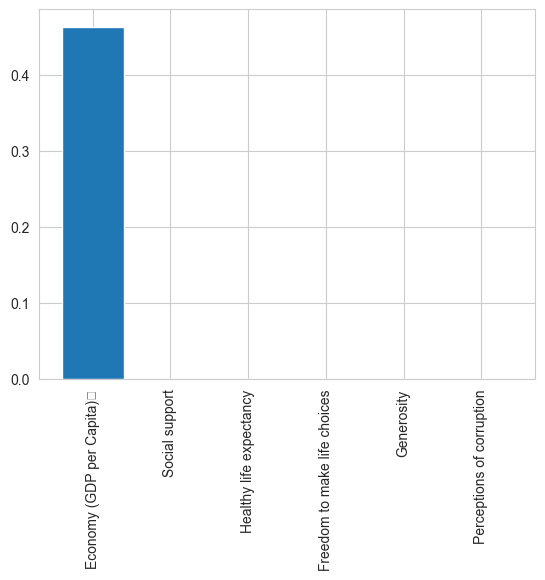

In [281]:
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)
lasso.fit(X, y)

relevant_columns = df.drop(["Country name", "Happiness Rank", "Happiness score", "Upperwhisker", "Lowerwhisker"], axis=1).columns

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(relevant_columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [282]:
# Define the parameter grid for Lasso Regression
param_grid = {"alpha": np.logspace(-4, 2, 10)}  # Testing alpha values from 0.0001 to 100

# Instantiate Lasso regression model
lasso = Lasso(max_iter=5000)  # Increasing iterations to avoid convergence issues

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# Get the best parameter and corresponding R² score
best_alpha = grid_search.best_params_["alpha"]
best_score = grid_search.best_score_

print(best_alpha, best_score)

0.046415888336127774 0.6991721712774586


In [283]:
lasso = Lasso(alpha=best_alpha, max_iter=5000)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.8352701269924278